# Intro
Here I am interested in patterns of subreddit usage, with the end goal of creating a subreddit recommender. I use Reddit's API to get user data. Then, I implement a K-Nearest-Neighbors model as the basis for a recommender.

# Downloading Data

In [1]:
# first install praw and update version
!pip install praw
!pip install --upgrade praw

In [1]:
# import libraries
import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import warnings
from prawcore.exceptions import Forbidden


# set pandas options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
# authenticate
reddit = praw.Reddit(
    client_id="4BDcoZtxjs2K_g",
    client_secret="4zW5t4vC96iRhZX1AebF8Sqwu9M",
    password="wlctfxc1",
    user_agent="testscript by me",
    username="fabulousburritos", # remove username and password before submission
)

In [32]:
# functions

# get n most popular subreddits
def get_popular_subs(n):
    subs = []
    popular_subreddits = reddit.subreddits.popular(limit=n)
    for subreddit in popular_subreddits:
        subs.append(subreddit.display_name)
    return subs

# get all commenters from top few posts of a specified subreddit
def get_commenters(sub): # from subreddit
    usernames = []
    subreddit = reddit.subreddit(sub)
    for submission in subreddit.top(limit=5, time_filter='month'):
        #print(f"Title: {submission.title}")
        for comment in submission.comments:
            if len(usernames) < 10:
                if isinstance(comment, praw.models.Comment):
                    try:
                        usernames.append(comment.author.name)
                    except AttributeError: # for deleted comments?
                        pass
            else:
                return usernames
    return usernames    

# get dict of subs and number of comments for a specified username
def get_sub_interactions(user):
    sub_dict = {}
    for comment in reddit.redditor(user).comments.new(limit=None):
        comment_sub = comment.subreddit.display_name
        if comment_sub not in sub_dict:
            sub_dict[comment_sub] = 1
        else:
            sub_dict[comment_sub] += 1
    return sub_dict

# ignore warnings - I think this runs fine
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# use above functions to create data frame
def make_comment_df():
    columns = ['username']
    df = pd.DataFrame({}, columns=columns)
    subreddits = get_popular_subs(150)
    commenters = []
    for subreddit in subreddits:
        commenters += get_commenters(subreddit)
    commenters = list(set(commenters)) # removes duplicates
    #print(len(commenters))
    for username in commenters:
        #print(username)
        try:
            sub_interactions = get_sub_interactions(username)
            new_row = pd.DataFrame({'username': [username]})
            df = pd.concat([df, new_row], ignore_index=True)
            df.fillna(0, inplace=True)
        except Forbidden:
            continue
        for s in sub_interactions:
            if s in df.columns:
                df.loc[df['username']==username, s] = sub_interactions[s]
            else:
                df[s] = [0] * len(df)
                df.loc[df['username']==username, s] = sub_interactions[s]
            #df.loc[len(df)] = [username, s, sub_interactions[s]]
    return df

In [138]:
# download data and save locally
df = make_comment_df()
df.to_csv('data/reddit.csv')

1478
SSundance
usinusin
LongSunOdyssey
SunlitHaddock5
Le_Sadie
IcedHemp77
banter_claus_69
Global_Criticism3178
Snoo-43285
pokipokimagicgirl
SkunkMonkey
TheUglyCasanova
mikerbyrne73
Lusca_UwU
SRZ_11
OhLadyMeg
TAU_equals_2PI
interyx
Nyaanner
gearskie
iknowthisischeesy
liadanaf
SeekersWorkAccount
gamergirlpee69
Ernapistapo
2x4skin
Jen5872
FoxyInTheSnow
dubs_guy
idiotshmidiot
PattyJ88
EllzGoesPro
Megakarp
Bubbagumpredditor
scrumchumdidumdum
Quality_Controller
Goodnight_big_baby
ADacome24
Icy_Cut_5572
Fashionreps_Linkify
arwinda
Sarahlump
shumnyj
Madixie_Normous
mngeese
vVWARLOCKVv
davidabernathy
TheFather__
Wazula23
crg2000
HeaAgaHalb
site17
LordosisLover
birdieno
PipelineBertaCoin69
Delica
aPriori07
TheDarkWayne
Freakkopath
drjunkie
CarsClothesTrees
IIIBKR
deus_explatypus
Hypixel-Blacksmith
GlaIie
TheQuinch
nice-_one
Coulrophiliac444
WP92
SrgtMamba
Adaptingqt
myquadscaresme
MountainSage58
Ult1mateN00B
kieranchuk
QueenOfTheSnarkness
GaIIick
ExtrovrtdIntrovrt
notxapple
bears2267
cronson
Dbl

honkey_tonker
davefnfbackup
3HaDeS3
nibbles200
TheHatMan22
christopia86
Elegant-Engine-3420
Bubbishka
WetDehydratedWater
Globalist_Nationlist
LauReus77
lordvbcool
SnooBunnies7461
if_u_suspend_ur_gay
FormalPineapple
KingRoach
Evylrune
Bad-Infinite
iXtreme9990
DRHAX34
concentrated-evil
Drussaxe
viking_sys
kprasdale
Youngadvisor12
Loopy_shoop
CookieXpress
lord-iam-new--
Jozz81
admirabladmiral
Felicia_Svilling
Cryterea
Hodorous
eheyburn
st1ck-n-m0ve
pinniped1
Somethingpretty007
tommyc463
Put_It_All_On_Blck
DolphinOnAMolly
Reaper318Z
Josiador
IC2Flier
Icarus_Sky1
Waveshakalaka
theREALlackattack
RYPIIE2006
AnonymousFledermaus
Abhi-shakes
Weegee_Spaghetti
Chromchris
AnnonAutist
BlazedLarry
SuperFanboysTV
Upstairs_Package8536
blueB0wser
Mitoria
DirtyDanTheManlyMan
skywalker4201
Rando_Kalrissian
mike_2797
krum_darkblud
Lewdeology
justaguy826
Bumping_Goose
HonestMistake_
theg721
FUNDMANN
AllOfMyTeamsSuck
fruskydekke
vinhluanluu
foundoutafterlunch
opelan
rogue-star-dust
Uhhh_Et_Tu_Brotus
safrigmi

Every_Caterpillar945
biddily
Murderface-04
Flashy-Section9588
RedCord18
GreyBlueWolf
Censourious
woaily
-copypastAI
Affectionate_Mix_188
Aurelio23
TheRealSynergist
karmagod13000
Robsgotgirth
Dark-Swan-69
geekfly
QuantityHefty3791
fnuduwuh
ryguy96y
Parrk
Gilgamesh_XII
Punjabiveer30
dgneo
CausticNox
Flat_Bodybuilder_175
jonohtin
Swampy1741
erin_bex
m5kurt4
Arget_Tharacyn
iHaveABigFatCat
scawtsauce
uNfair_weLc0me
ChangsWife
gingerbreadman42
sharingsilently
SnooGiraffes8200
TooLazyToReadIt
EnsonAmata
Pauliomanu
Creshal
YmmaT-
bigrig107
EldritchCleavage
Timely-Soup9090
Kreios333
Littlemeggie
propolizer
SpasmAndOrGasm
supergrl126301
Imgonnatouchthebutt
LetterLambda
FluffyTrexHentai
Acrzyguy
ExuDeku
levelonemage
Varnarok
Craftycrafter12
pennywaffer
CalvinMirandaMoritz
jeppe96
New_Channel_2688
Infinity_tk
JahoclaveS
TunaBarrett
AmazingSieve
porridgeirish
Olsson1234
NoTranslator4570
BlowUpYaSpot
TackyBrad
WhozRushing
nutshellprince
Me_Krally
Akeera1
Fuzzy_Calligrapher71
the_random_asian
mattjam

## Read Data From CSV

In [2]:
# load comments df
comments_df = pd.read_csv('data/reddit.csv')
comments_df.shape

(1469, 17607)

In [3]:
# save usernames, drop columns that aren't a subreddit
usernames = comments_df['username']
subs_df = comments_df.drop(columns=['Unnamed: 0', 'username'])

# EDA

## User Number of Comments Histogram

total comments: 1106971
mean comments: 753
median comments: 995


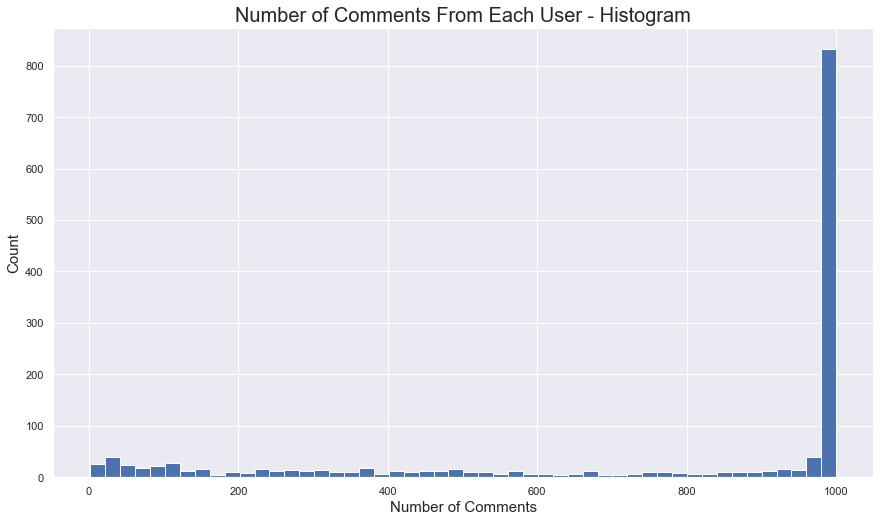

In [216]:
# get total comments for each user
user_total_comments = subs_df.sum(axis=1)

# stats
print(f'total comments: {int(user_total_comments.sum())}')
print(f'mean comments: {int(user_total_comments.mean())}')
print(f'median comments: {int(user_total_comments.median())}')


# plot histogram
plt.hist(user_total_comments, bins=50)
plt.title('Number of Comments From Each User - Histogram', fontsize=20)
plt.xlabel('Number of Comments', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## Subreddits by Number of Comments

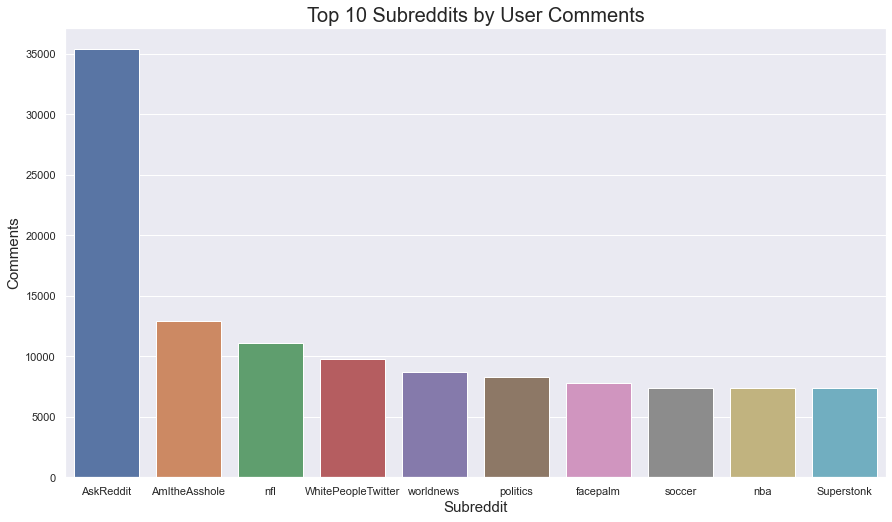

In [172]:
# drop columns - get rid of usernames
subs_df = comments_df.drop(columns=['Unnamed: 0', 'username'])

# get total comments for each subreddit
subreddit_sums = subs_df.sum()
subreddit_sums.sort_values(ascending=False, inplace=True) # sort

# create barplot
sns.set(rc={'figure.figsize':(14.7,8.27)}) # set plot
sns.barplot(x=subreddit_sums[:10].index, y=subreddit_sums[:10].values)
plt.xlabel('Subreddit', fontsize=15)
plt.ylabel('Comments', fontsize=15)
plt.title('Top 10 Subreddits by User Comments', fontsize=20)
plt.show()

# Correlations

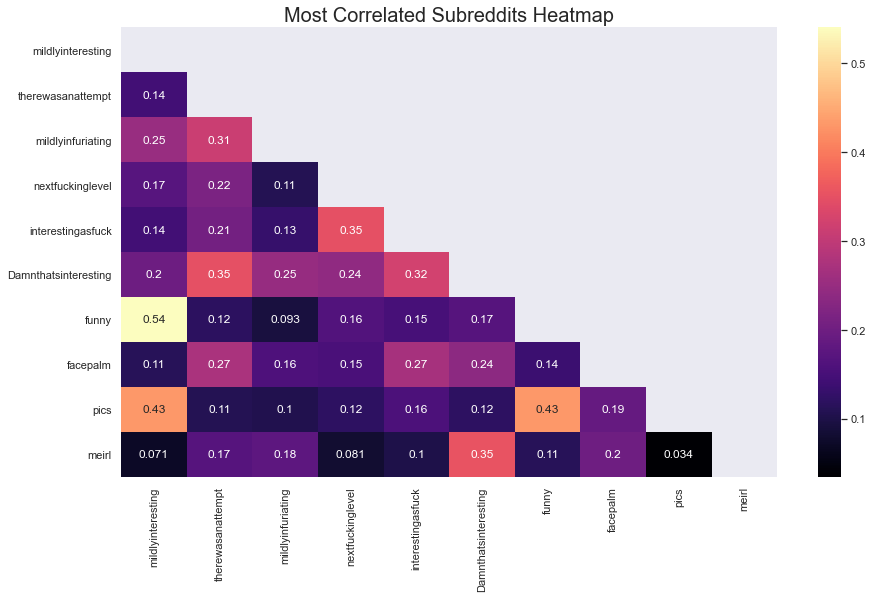

In [168]:
# correlation of n most popular subreddits
n_subreddits = 50
subreddit_names = subreddit_sums[:n_subreddits].index
df = subs_df[subreddit_names]
corr = df.corr()

# get the 10 highest (absolute value) correlations
N = 30
abs_corr_values = corr.abs().unstack()
abs_corr_values = abs_corr_values[abs_corr_values != 1]  # Remove correlations of 1 (correlation with itself)
abs_corr_values = abs_corr_values.sort_values(ascending=False)
top_correlations = abs_corr_values[:N]
top_corr_matrix = pd.DataFrame(top_correlations.values.reshape(N, 1), columns=['Correlation'], index=top_correlations.index)
first_values = [x[0] for x in top_correlations.index]
correlated_subreddits = list(set(first_values))
correlated_subreddits

# make heat map
mask = np.zeros_like(corr[correlated_subreddits].loc[correlated_subreddits])
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr[correlated_subreddits].loc[correlated_subreddits], mask=mask, annot=True, cmap='magma')
plt.title('Most Correlated Subreddits Heatmap', fontsize=20)
plt.show()

## Most Commented Subreddits For Users of a Single Subreddit

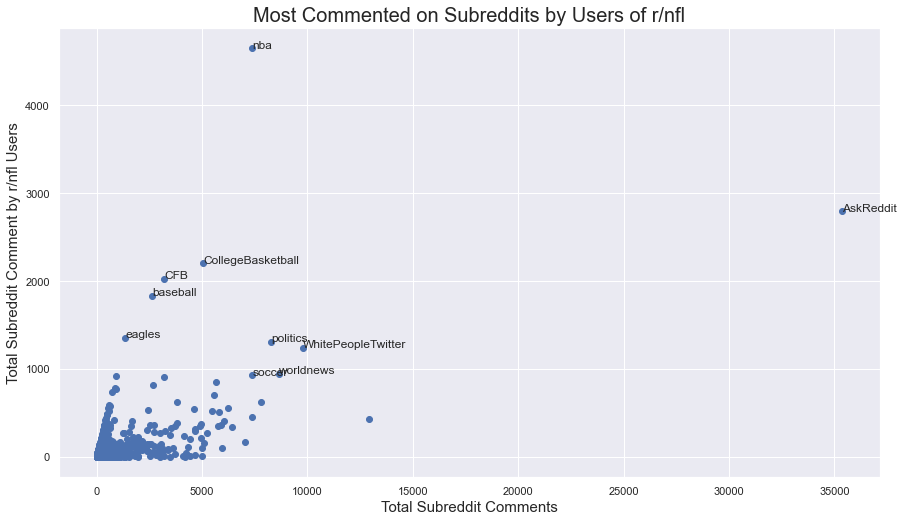

Most Commented on Subreddits
nba                   4652.0
AskReddit             2796.0
CollegeBasketball     2203.0
CFB                   2027.0
baseball              1831.0
eagles                1357.0
politics              1308.0
WhitePeopleTwitter    1243.0
worldnews              945.0
soccer                 929.0
dtype: float64


In [123]:
# select subreddit -  look at n comments and n users of other subs?
sub = 'nfl'
sub_users_df = subs_df.drop(subs_df[subs_df[sub]==0].index) # drop people who dont use that sub
sub_users_df.drop(sub, axis=1, inplace=True) # drop that sub
most_commented = sub_users_df.sum().sort_values(ascending=False)
n_users = sub_users_df.astype(bool).sum()

# compare to total of each sub
columns = most_commented.index.values # do we need .values here?
most_commented_total = subs_df[columns].sum()

# plot
x = most_commented_total.values
y = most_commented.values
to_label = range(10)
plt.scatter(x=most_commented_total.values, y=most_commented.values)
for i in to_label:
    plt.annotate(f'{most_commented.index[i]}', (x[i], y[i]))
plt.title(f'Most Commented on Subreddits by Users of r/{sub}', fontsize=20)
plt.xlabel('Total Subreddit Comments', fontsize=15)
plt.ylabel(f'Total Subreddit Comment by r/{sub} Users', fontsize=15)
plt.show()

print('Most Commented on Subreddits')
print(most_commented[:10])

# K Nearest Neighbors

In [4]:
# find the optimal hyperparameters for a K Nearest Neighbors Model

# remove users fav sub
def recommend_subs(n, m):
    zeros = 0
    ranks = []
    for user in usernames.values: # loop through all usernames
        row = subs_df[usernames==user]
        max_col = row.idxmax(axis=1) # get most used sub for that user
        df = subs_df.drop(max_col, axis=1)
        row = row.drop(max_col, axis=1)
        active_cols = row.loc[:, (row != 0).any(axis=0)].columns # get all used subs for user
        #print(active_cols)
        row = row[active_cols] # project row/df into space of only active subs
        df = df[active_cols]
        neighbors = NearestNeighbors(n_neighbors=n, metric=m)
        try:
            neighbors.fit(df)
        except ValueError:
            continue
        distances, indices = neighbors.kneighbors(row)
        indices = indices[0][1:]
        neighbors_df = subs_df.loc[indices]
        neighbors_df.drop(active_cols, axis=1, inplace=True)
        neighbors_sums = neighbors_df.sum()
        neighbors_sums.sort_values(ascending=False, inplace=True)
        if neighbors_sums[max_col].values[0]== 0:
            zeros += 1
        else:
            rank = neighbors_sums.index.get_loc(max_col.values[0])
            ranks.append(rank)
            #print(max_col, rank)

    return ranks

# parameters to test
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
ms = ['minkowski', 'manhattan', 'cosine']


# append to list
rank_list = []
for m in ms:
    for n in ns:
        r = recommend_subs(n, m)
        rank_list.append(r)  

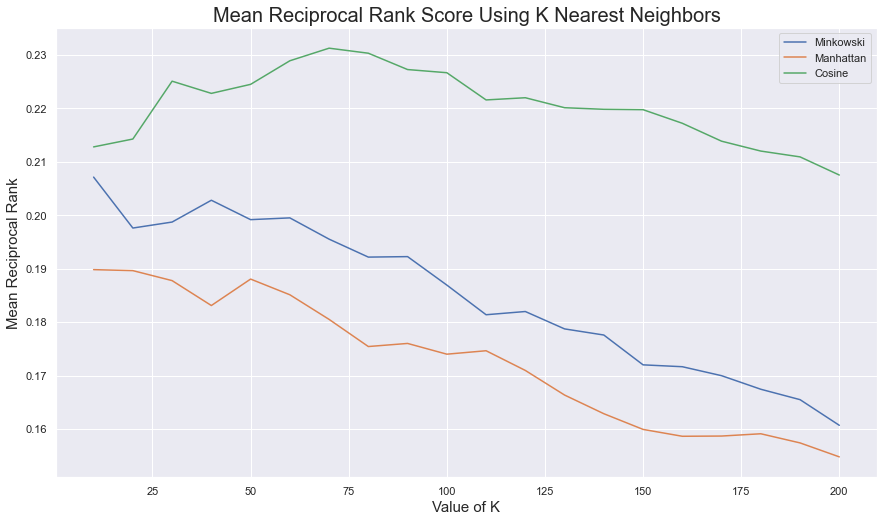

In [18]:
# compute Mean Reciprocal Rank scores for each set o
mink_sums = []
manh_sums = []
cos_sums = []
for r in rank_list[:20]:
    recips = 1 / (np.array(r) + 1)
    mink_sums.append(sum(recips) / len(recips))
    
for r in rank_list[20:40]:
    recips = 1 / (np.array(r) + 1)
    manh_sums.append(sum(recips) / len(recips))
    
for r in rank_list[40:]:
    recips = 1 / (np.array(r) + 1)
    cos_sums.append(sum(recips) / len(recips))
    

# plot
sns.set(rc={'figure.figsize':(14.7,8.27)}) # set plot
plt.plot(ns, mink_sums, label='Minkowski')
plt.plot(ns, manh_sums, label='Manhattan')
plt.plot(ns, cos_sums, label='Cosine')
plt.legend()
plt.title('Mean Reciprocal Rank Score Using K Nearest Neighbors', fontsize=20)
plt.xlabel('Value of K', fontsize=15)
plt.ylabel('Mean Reciprocal Rank', fontsize=15)
plt.show()

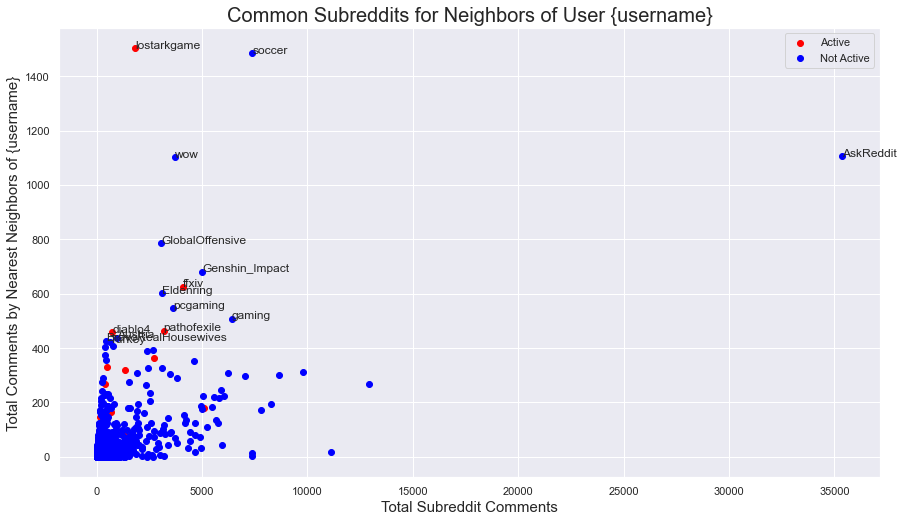

Top Recommendations:
soccer                 1484.0
AskReddit              1105.0
wow                    1101.0
GlobalOffensive         786.0
Genshin_Impact          680.0
Eldenring               601.0
pcgaming                547.0
gaming                  507.0
Austria                 438.0
BravoRealHousewives     427.0
dtype: float64


In [121]:
# use KNN with selected hyper parameters to recommend subreddits
def recommend_preexisting(user):
    row = subs_df[usernames==user]
    active_cols = row.loc[:, (row != 0).any(axis=0)].columns
    row = row[active_cols]
    df = subs_df[active_cols]
    neighbors = NearestNeighbors(n_neighbors=75, metric='cosine')
    neighbors.fit(df)
    distances, indices = neighbors.kneighbors(row)
    indices = indices[0][1:]
    nbrs = subs_df.loc[indices]
    
    # plot sub activity
    nbrs_sums = nbrs.sum().sort_values(ascending=False)
    columns = nbrs_sums.index
    all_sums = subs_df[columns].sum() # might be redundant
    x = all_sums.values 
    y = nbrs_sums.values
    active_indices = np.where(nbrs_sums.index.isin(active_cols))
    not_active_indices = np.where(~nbrs_sums.index.isin(active_cols))
    sns.set(rc={'figure.figsize':(14.7,8.27)})
    plt.scatter(x[active_indices], y[active_indices], c='red', label='Active')
    plt.scatter(x[not_active_indices], y[not_active_indices], c='blue', label='Not Active')
    plt.legend()
    plt.title('Common Subreddits for Neighbors of User {username}', fontsize=20)
    plt.xlabel('Total Subreddit Comments', fontsize=15)
    plt.ylabel('Total Comments by Nearest Neighbors of {username}', fontsize=15)
    
    # annotate 
    to_label = range(15)
    for i in to_label:
        plt.annotate(f'{nbrs_sums.index[i]}', (x[i], y[i]))
    plt.show()

    
    
    nbrs.drop(active_cols, axis=1, inplace=True)
    print('Top Recommendations:')
    print(nbrs.sum().sort_values(ascending=False)[:10])
    
recommend_preexisting('krum_darkblud')

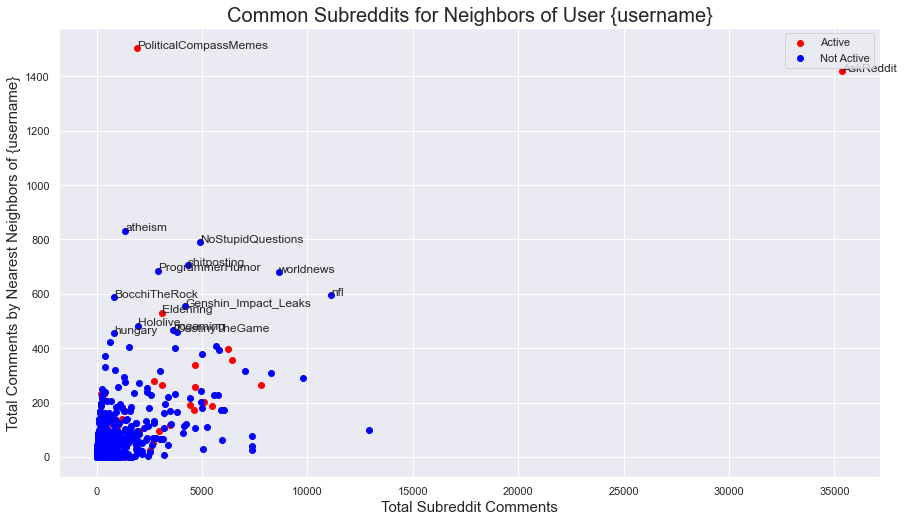

Top Recommendations:
atheism                 833.0
NoStupidQuestions       789.0
shitposting             705.0
ProgrammerHumor         684.0
worldnews               679.0
nfl                     595.0
BocchiTheRock           588.0
Genshin_Impact_Leaks    554.0
Hololive                482.0
pcgaming                467.0
dtype: float64


In [124]:
# function that can recommend subreddits to any user
def recommend(username):
    # get user activity
    user = reddit.redditor(username)
    subreddit_counts = {}
    for comment in user.comments.new(limit=None):
        subreddit = comment.subreddit.display_name
        if subreddit not in subreddit_counts:
            subreddit_counts[subreddit] = 1
        else:
            subreddit_counts[subreddit] += 1
    # find neighbors
    row = pd.DataFrame([subreddit_counts])
    active_cols = row.columns
    try:
        df = subs_df[active_cols]
    except KeyError as e:
        my_string = e.args[0]
        split_string = my_string.split("]", 1)
        my_string = split_string[0][1:]
        my_list = my_string.split()
        for i in range(len(my_list)):
            my_list[i] = my_list[i][1:-1]
            if i < len(my_list) - 1:
                my_list[i] = my_list[i][:-1]
        col_list = list(active_cols)
        for item in my_list:
            col_list.remove(item)
        df = subs_df[col_list]
    neighbors = NearestNeighbors(n_neighbors=75, metric='cosine')
    neighbors.fit(df)
    distances, indices = neighbors.kneighbors(row[col_list])
    indices = indices[0][1:]
    nbrs = subs_df.loc[indices]

# plot sub activity
    nbrs_sums = nbrs.sum().sort_values(ascending=False)
    columns = nbrs_sums.index
    all_sums = subs_df[columns].sum() # might be redundant
    x = all_sums.values 
    y = nbrs_sums.values
    active_indices = np.where(nbrs_sums.index.isin(active_cols))
    not_active_indices = np.where(~nbrs_sums.index.isin(active_cols))
    sns.set(rc={'figure.figsize':(14.7,8.27)})
    plt.scatter(x[active_indices], y[active_indices], c='red', label='Active')
    plt.scatter(x[not_active_indices], y[not_active_indices], c='blue', label='Not Active')
    plt.legend()
    plt.title('Common Subreddits for Neighbors of User {username}', fontsize=20)
    plt.xlabel('Total Subreddit Comments', fontsize=15)
    plt.ylabel('Total Comments by Nearest Neighbors of {username}', fontsize=15)
    # annotate 
    to_label = range(15)
    for i in to_label:
        plt.annotate(f'{nbrs_sums.index[i]}', (x[i], y[i]))
    plt.show()
    
    # show top recommendations    
    nbrs.drop(col_list, axis=1, inplace=True)
    print('Top Recommendations:')
    print(nbrs.sum().sort_values(ascending=False)[:10])
    
recommend('Yemm')